### 신세계
- 신세계그룹은 백화점(신세계)과 대형마트(이마트)를 핵심사업
* SWOT 분석
    - 강점 Strength : 독창적인 전략 ,대표의 SNS
         * '스타필드' 복합쇼핑몰 
             -  하남점 2400만명, 고양점 2000만명    위례점
         * '이마트타운'이라는 대형화·복합화 전략
         * '트레이더스'
         * 가전 양판점인 '일렉트로마트'
         * '삐에로쑈핑' 
         
    - 약점 Weakness : 내수부진에 백화점·대형마트 실적 '동반 악화'…신용등급 하향까지
        * 유통업에 편중된 사업구조 
        * '내수 소비 부진' 여파
        * 올해 1분기 신세계는 매출 3750억원, 영업이익 533억원을 기록
        * 지난해 같은 기간보다 12%, 10%씩 꺾임. 
        * 신세계백화점 인천점을 롯데백화점에게 뺏김
        * 백화점 시장점유율도 25.7%에서 22.6%로 내려앉음
        * '업계 2위' 자리도 간신히 지켜냄
        
        * 이마트(연결기준) 1분기 영업이익은 743억원에 그치며 전년동기 대비 절반 이상 줄음
        * 트레이더스·노브랜드·엘렉트로마트 
        * 별도기준으로 살펴보면 같은 기간 영업이익은 33.9% 감소하며 1068억원
        * 한국기업평가는 2019 5월 30일 이마트 신용등급 '안정적(Stable)'>'부정적(Negative)'으로 하향 
        
        
    - 기회 Opportunity 정부 '국제테마파크' 지원 유력…영등포 인근 '신세계타운' 기회
        * 민간·공공 부문 투자활성화 방안-> 화성시 국제테마파크를 준비
        * 
    

    - 위협 Threat : 유통 규제 강화…지배구조도 유동적
        * 유통 관련 정부규제는 강화되는 추세
        * 대형마트와 기업형슈퍼마켓(SSM)은 영업시간 제한, 강제 의무휴업일 도입
        * 신규점포 개설 제한 등 규제
        * 정 부회장은 이명희 신세계그룹 회장과 국민연금공단에 이어 3대 주주
        * 2019 4월에서야 이마트 주식 14만주를 매입하면서 2대 주주로 올라
        * 이 부회장이 보유한 이마트 지분은 10.33% 수준으로 국민연금(10% 내외)로 비슷


In [3]:
import numpy as np
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import json

In [83]:
url='https://openapi.naver.com/v1/datalab/search'
client_id='Y6_59yU2c1s3c8wOgM_U'
client_secret='Orn3QuswGB'

In [94]:
ndata={
  "startDate": "2017-01-01",
  "endDate": "2021-03-01",
  "timeUnit": "date",
  "keywordGroups": [
    {
      "groupName": "ssg_T",
      "keywords": [
        "신세계",
        "쓱배송",
        "이마트",
        "신세계 백화점",
      ]
    },
    {
      "groupName": "lotte_T",
      "keywords": [
        "롯데백화점",
        "롯데홈쇼핑",
        "롯데몰",
      ]
    },  
    {
      "groupName": "hyundai_T",
      "keywords": [
        "현대백화점",
        "현대홈쇼핑",
        "더현대",
        "hmall",
      ]
    },        
    {
      "groupName": "online_T",
      "keywords": [
        "마켓컬리",
        "옥션",
        "지마켓",
        "인터파크",
        "네이버쇼핑",
      ]
    },         
    {
      "groupName": "coupang_T",
      "keywords": [
        "쿠팡",
        "로켓배송"
      ]
    }
  ],
}

In [95]:
header={'Content-Type': 'application/json','X-Naver-Client-Id':client_id,'X-Naver-Client-Secret':client_secret}
res=requests.post(url,headers=header,data=json.dumps(ndata))

In [96]:
if(res.status_code==200):
    rjson=res.json()
rjson

{'startDate': '2017-01-01',
 'endDate': '2021-03-01',
 'timeUnit': 'date',
 'results': [{'title': 'ssg_T',
   'keywords': ['신세계', '쓱배송', '정용진', '이마트', '신세계 백화점'],
   'data': [{'period': '2017-01-01', 'ratio': 2.78732},
    {'period': '2017-01-02', 'ratio': 1.54225},
    {'period': '2017-01-03', 'ratio': 1.32785},
    {'period': '2017-01-04', 'ratio': 1.35442},
    {'period': '2017-01-05', 'ratio': 1.3498},
    {'period': '2017-01-06', 'ratio': 1.35748},
    {'period': '2017-01-07', 'ratio': 1.43547},
    {'period': '2017-01-08', 'ratio': 1.94597},
    {'period': '2017-01-09', 'ratio': 1.47959},
    {'period': '2017-01-10', 'ratio': 1.33559},
    {'period': '2017-01-11', 'ratio': 1.42593},
    {'period': '2017-01-12', 'ratio': 1.63975},
    {'period': '2017-01-13', 'ratio': 1.48844},
    {'period': '2017-01-14', 'ratio': 1.44159},
    {'period': '2017-01-15', 'ratio': 1.86655},
    {'period': '2017-01-16', 'ratio': 1.61925},
    {'period': '2017-01-17', 'ratio': 1.41918},
    {'period':

In [97]:
def makeGdata(rjson):
    rjson['results'][0]['title']
    i=0
    trend={}
    for i in range(len(rjson['results'])):
        trend[i]={'x':[],'y':[],'title':rjson['results'][i]['title']}
        for d in rjson['results'][i]['data']:
            trend[i]['x'].append(d['period'])
            trend[i]['y'].append(d['ratio'])

In [99]:
def makeGgraph(rjson,trend):
    for i in range(len(rjson['results'])): 
        plt.plot(trend[i]['x'],trend[i]['y'],label=trend[i]['title'])
    plt.legend()
    plt.show()

In [109]:
ser={}
for i in range(len(rjson['results'])):
    rdate=[]
    ser[rjson['results'][i]['title']]=[]
    for d in rjson['results'][i]['data']:
        rdate.append(d['period'])
        ser[rjson['results'][i]['title']].append(d['ratio'])

In [110]:
print(len(rdate),len(ser['ssg_T']))

1521 1521


In [111]:
rdate[:5]

['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05']

In [112]:
ser['ssg_T'][:5]

[2.78732, 1.54225, 1.32785, 1.35442, 1.3498]

In [113]:
df=pd.DataFrame(data=ser, index=rdate)
df.head()

,ssg_T,lotte_T,hyundai_T,online_T,coupang_T
2017-01-01,2.78732,2.16009,1.39625,6.72903,4.08339
2017-01-02,1.54225,1.84948,1.29359,10.95061,6.14398
2017-01-03,1.32785,1.63980,1.23029,11.64886,6.12838
2017-01-04,1.35442,1.63083,1.24966,11.23184,5.93894
2017-01-05,1.34980,1.55803,1.22721,10.72779,5.79622


<AxesSubplot:>

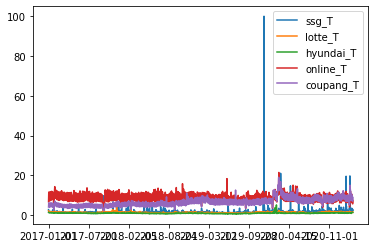

In [114]:
df.plot()